In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Reading Data from a CSV File

This code snippet is designed to read data from a CSV file into a DataFrame using Pandas. It's a common operation in data analysis workflows to import and initially inspect data.

### Steps:

1. **Read CSV File:**
   - Pandas' `read_csv` function is used to read the data from a specified CSV file path into a DataFrame. This process converts the tabular data in the CSV file into a DataFrame, a versatile and powerful data structure.

2. **Initial Data Inspection:**
   - The `head()` method of the DataFrame is utilized to print the first few rows of the DataFrame. This initial inspection is useful for verifying that the data has been loaded correctly and to get a quick overview of the data's structure and contents.

In [3]:
# Read data from the CSV file into a DataFrame
df = pd.read_csv('csv file path')

# Print the first few rows of the DataFrame for initial inspection
print(df.head())

   Time (sec)  Time (min)  cum_time (min)  \
0        1201   20.016667       20.016667   
1        1258   20.966667       20.966667   
2        1310   21.833333       21.833333   
3        1363   22.716667       22.716667   
4        1415   23.583333       23.583333   

                                          Image Name  \
0  2001_2023_05_22_T1_XY01_finalprediction.ome_0.png   
1  2001_2023_05_22_T1_XY02_finalprediction.ome_0.png   
2  2001_2023_05_22_T1_XY03_finalprediction.ome_0.png   
3  2001_2023_05_22_T1_XY04_finalprediction.ome_0.png   
4  2001_2023_05_22_T1_XY05_finalprediction.ome_0.png   

   Number of crystals formed   run   T     M  rectangular  circular  
0                         14  2001  T1  XY01            3        11  
1                         26  2001  T1  XY02            2        24  
2                         30  2001  T1  XY03            3        27  
3                         20  2001  T1  XY04            2        18  
4                         12  2001  T1  XY

## Grouping Data and Creating Separate DataFrames

This code snippet demonstrates how to group data in a DataFrame based on a specific column and then create separate DataFrames for each group. This is particularly useful in data analysis for handling and analyzing categorized data.

### Steps:

1. **Group DataFrame by a Column:**
   - The DataFrame (`df`) is grouped based on the values in the 'M' column. This creates a group object where the data is segmented according to the unique values in that column.

2. **Create Separate DataFrames for Each Group:**
   - Iterating over each group, separate DataFrames are created for each unique value in the 'M' column. These are stored in a list (`smaller_dataframes`).

3. **Print Each Grouped DataFrame:**
   - Each of the smaller DataFrames created from the groups is printed out. This allows for a detailed inspection of the data categorized by the 'M' column.

This approach is effective for segmenting a dataset into smaller, more manageable subsets based on categorical variables.


In [4]:
# Group the DataFrame by the 'M' column
groups = df.groupby('M')

# Initialize a list to store smaller DataFrames for each group
smaller_dataframes = []

# Iterate over each group and create a separate DataFrame
for group_name, group_df in groups:
    smaller_dataframes.append(group_df.copy())

# Print each of the smaller DataFrames for inspection
for i, smaller_df in enumerate(smaller_dataframes):
    print(f"DataFrame {i + 1}:")
    print(smaller_df)
    print()  # Print a newline for better readability

DataFrame 1:
     Time (sec)  Time (min)  cum_time (min)  \
0          1201   20.016667       20.016667   
16         2101   35.016667       35.016667   
32         3909   65.150000       65.150000   
48         5246   87.433333       87.433333   
64         6585  109.750000      109.750000   
80            1    0.016667      110.716667   
96          901   15.016667      125.716667   
112        2709   45.150000      155.850000   
128        4046   67.433333      178.133333   
144        5385   89.750000      200.450000   
160        6698  111.633333      222.333333   
176        8024  133.733333      244.433333   
192        9347  155.783333      266.483333   
208       10679  177.983333      288.683333   
224       12010  200.166667      310.866667   
240           1    0.016667      331.600000   

                                            Image Name  \
0    2001_2023_05_22_T1_XY01_finalprediction.ome_0.png   
16   2001_2023_05_22_T2_XY01_finalprediction.ome_0.png   
32   2001_202

## Adding a New Row to Multiple DataFrames

This code snippet illustrates how to add a new row to each DataFrame in a list of DataFrames. The new row is predefined with specific values and is added to the beginning of each DataFrame. This technique is useful for initializing or adding benchmark data to multiple data segments in a dataset.

### Steps:

1. **Define the New Row:**
   - A dictionary (`new_row_values`) is created with the values for the new row. Each key corresponds to a column name in the DataFrames.

2. **Iterate and Add New Row:**
   - Each DataFrame in the list `smaller_dataframes` is iterated over.
   - The new row is converted into a DataFrame and concatenated to the beginning of each existing DataFrame.
   - The indices of the DataFrame are reset after concatenation to maintain a sequential order.

3. **Update the List of DataFrames:**
   - The modified DataFrame is then saved back into the `smaller_dataframes` list.

4. **Print the Updated DataFrames:**
   - Each updated DataFrame in the list is printed out for inspection, showing the newly added row at the top.

This method efficiently updates a collection of DataFrames, ensuring that each segment of the data includes the new information.

In [5]:
import pandas as pd

# Values for the new row
new_row_values = {
    'Time (sec)': 0,
    'Time (min)': 0,
    'cum_time (min)': 0,
    'Image Name': 'None',
    'Number of crystals formed': 0,
    'run': 2001,
    'T': 'T0',
    'M': 'XY00',
    'rectangular': '0',
    'circular': '0'
}

# Iterate over the smaller DataFrames and add the new row
for i, smaller_df in enumerate(smaller_dataframes):
    # Convert new row values to DataFrame
    new_row = pd.DataFrame(new_row_values, index=[0])
    # Concatenate new row at the beginning of the DataFrame
    smaller_df = pd.concat([new_row, smaller_df]).reset_index(drop=True)
    
    # Update the DataFrame in the list
    smaller_dataframes[i] = smaller_df

# Print the updated smaller DataFrames
for i, smaller_df in enumerate(smaller_dataframes):
    print(f"DataFrame {i + 1}:")
    print(smaller_df)
    print()  # Print a newline for better readability

DataFrame 1:
    Time (sec)  Time (min)  cum_time (min)  \
0            0    0.000000        0.000000   
1         1201   20.016667       20.016667   
2         2101   35.016667       35.016667   
3         3909   65.150000       65.150000   
4         5246   87.433333       87.433333   
5         6585  109.750000      109.750000   
6            1    0.016667      110.716667   
7          901   15.016667      125.716667   
8         2709   45.150000      155.850000   
9         4046   67.433333      178.133333   
10        5385   89.750000      200.450000   
11        6698  111.633333      222.333333   
12        8024  133.733333      244.433333   
13        9347  155.783333      266.483333   
14       10679  177.983333      288.683333   
15       12010  200.166667      310.866667   
16           1    0.016667      331.600000   

                                           Image Name  \
0                                                None   
1   2001_2023_05_22_T1_XY01_finalprediction.

## Summing Up Last Values from Multiple DataFrames

This code snippet is designed to accumulate the last values of specific columns across multiple DataFrames. It's a useful approach for aggregating final data points in a series of related data segments.

### Steps:

1. **Initialize Storage for Last Values:**
   - A list `last_values` is initialized to store the cumulative sum of the last values from specific columns across all DataFrames.

2. **Iterate Through DataFrames:**
   - The code iterates over each DataFrame in the `smaller_dataframes` list.

3. **Accumulate Last Values:**
   - For each DataFrame, the last values of the columns "Number of crystals formed," "rectangular," and "circular" are added to the corresponding elements in the `last_values` list. 

4. **Display Cumulative Sums:**
   - After iterating through all DataFrames, the cumulative sums of the last values of these columns are printed.

This process effectively summarizes the final data points of each DataFrame, providing a consolidated view of the ending values in the dataset.


In [6]:
# Initialize a list to store the last values of the specified columns
last_values = [0, 0, 0]

# Iterate over the smaller DataFrames and accumulate the last values of specific columns
for i, smaller_df in enumerate(smaller_dataframes):
    # Sum the last value of the "Number of crystals formed" column
    last_values[0] += smaller_df["Number of crystals formed"].iloc[-1]
    # Sum the last value of the "rectangular" column
    last_values[1] += smaller_df["rectangular"].iloc[-1]
    # Sum the last value of the "circular" column
    last_values[2] += smaller_df["circular"].iloc[-1]

# Print a summary of the cumulative sums of last values from each column
print(f"Total of last 'Number of crystals formed' values across all DataFrames: {last_values[0]}")
print(f"Total of last 'rectangular' values across all DataFrames: {last_values[1]}")
print(f"Total of last 'circular' values across all DataFrames: {last_values[2]}")


Total of last 'Number of crystals formed' values across all DataFrames: 515
Total of last 'rectangular' values across all DataFrames: 98
Total of last 'circular' values across all DataFrames: 417


In [7]:
# Read data from the CSV file into a DataFrame
droplet_df = pd.read_excel('C:/Users/a.obaied/Documents/Projects/4_half_life/results_for_analysis/number_of_droplets_CaCl2.xlsx')
base_values_for_droplets = droplet_df.iloc[:, 1].values
# Print the first few rows of the DataFrame for initial inspection
print(base_values_for_droplets)

[43 50 51 47 48 50 51 52 53 44 49 49 48 46 50 47]


In [8]:
# Iterate over each smaller DataFrame and calculate the 'number_of_droplets' column
for i, smaller_df in enumerate(smaller_dataframes):
    # Get the base value for the calculation
    base_value = base_values_for_droplets[i]

    # Initialize the 'number_of_droplets' column
    smaller_df['number_of_droplets'] = base_value - smaller_df['Number of crystals formed']

    # Update the DataFrame in the list
    smaller_dataframes[i] = smaller_df

# Optionally, print the updated smaller DataFrames to check the new column
for i, smaller_df in enumerate(smaller_dataframes):
    print(f"Updated DataFrame {i + 1}:")
    print(smaller_df)
    print()  # Print a newline for better readability


Updated DataFrame 1:
    Time (sec)  Time (min)  cum_time (min)  \
0            0    0.000000        0.000000   
1         1201   20.016667       20.016667   
2         2101   35.016667       35.016667   
3         3909   65.150000       65.150000   
4         5246   87.433333       87.433333   
5         6585  109.750000      109.750000   
6            1    0.016667      110.716667   
7          901   15.016667      125.716667   
8         2709   45.150000      155.850000   
9         4046   67.433333      178.133333   
10        5385   89.750000      200.450000   
11        6698  111.633333      222.333333   
12        8024  133.733333      244.433333   
13        9347  155.783333      266.483333   
14       10679  177.983333      288.683333   
15       12010  200.166667      310.866667   
16           1    0.016667      331.600000   

                                           Image Name  \
0                                                None   
1   2001_2023_05_22_T1_XY01_finalpre

In [9]:
# Assuming your list of DataFrames is named `smaller_dataframes`
lengths = [len(df) for df in smaller_dataframes]

# Check if all lengths are the same
all_same_length = all(length == lengths[0] for length in lengths)

print("Are all DataFrames the same length?", all_same_length)
if not all_same_length:
    print("Lengths of each DataFrame:", lengths)


Are all DataFrames the same length? True


Half-Life: 27.42 min


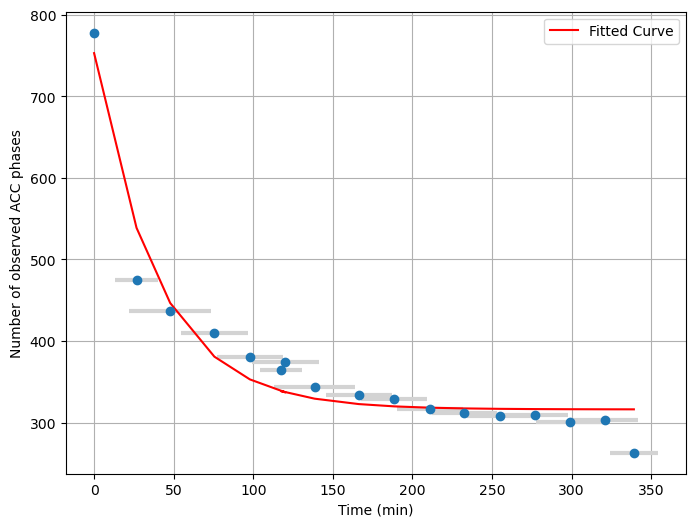

In [25]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Define the exponential decay function with offset
def exponential_decay_with_offset(t, A, k, C):
    return A * np.exp(-k * t) + C

# We need your actual experimental data here
summed_droplets = np.sum([df['number_of_droplets'].values for df in filtered_dataframes], axis=0)

# Calculate 'cum_time (min)' range and mean for each sequence position
cum_time_ranges = np.ptp([df['cum_time (min)'].values for df in filtered_dataframes], axis=0)
cum_time_means = np.mean([df['cum_time (min)'].values for df in filtered_dataframes], axis=0)

# Initial parameter guesses
A_guess = np.max(summed_droplets)
k_guess = 1 / np.mean(cum_time_means)
C_guess = np.min(summed_droplets)  # If the decay does not go to zero

# Fit the data to the model
params, covariance = curve_fit(
    exponential_decay_with_offset, 
    cum_time_means, 
    summed_droplets, 
    p0=[A_guess, k_guess, C_guess],
    maxfev=10000
)

# Calculate the half-life from the fitted parameter k
A_fit, k_fit, C_fit = params
half_life = np.log(2) / k_fit


# Print the half-life value
print(f'Half-Life: {half_life:.2f} min')
# Generate the fitted curve
fitted_curve = exponential_decay_with_offset(cum_time_means, A_fit, k_fit, C_fit)

# Create the decay function as a string
decay_function = f'$A \cdot e^{{-{k_fit:.4f} \cdot t}} + {C_fit:.4f}$'

# Plot the original data and the fitted curve with decay function
plt.figure(figsize=(8, 6))
plt.errorbar(cum_time_means, summed_droplets, xerr=cum_time_ranges, fmt='o', ecolor='lightgray', elinewidth=3, capsize=0)
plt.plot(cum_time_means, fitted_curve, label=f'Fitted Curve', color='red')
# plt.xlabel('Mean Cumulative Time (min)')
plt.xlabel('Time (min)')
plt.ylabel('Number of observed ACC phases')
# plt.title(f'Exponential Decay with Offset\nHalf-Life: {half_life:.2f} min')
plt.grid(True)
plt.legend()

# Add a text box with the decay function equation
# textbox = plt.text(0.5, 0.6, decay_function, transform=plt.gca().transAxes, fontsize=12, color='blue',
#                     bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})

# Save the figure as a PNG file
plt.savefig('C:/Users/a.obaied/Documents/Projects/4_half_life/results_for_analysis/number_of_droplets_vs_time_with_HL.png', dpi=300, bbox_inches='tight')

plt.show()
